$CustomerID$: Customer ID unique for each customer
<br>
<br>
$gender$: Whether the customer is a male or a female
<br>
<br>
$SeniorCitizen$: Whether the customer is a senior citizen or not (1, 0)- Müşterinin yaşlı olup olmadığı
<br>
<br>
$Partner$: Whether the customer has a partner or not (Yes, No)-Müşterinin bir ortağı var mı yok mu
<br>
<br>
$Dependent$: Whether the customer has dependents or not (Yes, No)
<br>
<br>
$PhoneService$: Whether the customer has a phone service or not (Yes, No)
<br>
<br>
$MultipeLines$: Whether the customer has multiple lines or not (Yes, No, No phone service)-Müşterinin birden fazla hattı olup olmadığı
<br>
<br>
$InternetService$: Customer’s internet service provider (DSL, Fiber optic, No)
<br>
<br>
$OnlineSecurity$: Whether the customer has online security or not (Yes, No, No internet service)
<br>
<br>
$OnlineBackup$: Whether the customer has an online backup or not (Yes, No, No internet service)
<br>
<br>
$DeviceProtection$: Whether the customer has device protection or not (Yes, No, No internet service)
<br>
<br>
$TechSupport$: Whether the customer has tech support or not (Yes, No, No internet service)
<br>
<br>
$StreamingTV$: Whether the customer has streaming TV or not (Yes, No, No internet service)
<br>
<br>
$StreamingMovies$: Whether the customer has streaming movies or not (Yes, No, No internet service)
<br>
<br>
$Contract$: The contract term of the customer (Month-to-month, One year, Two years)-Müşterinin sözleşme süresi
<br>
<br>
$PaperlessBilling$: The contract term of the customer (Month-to-month, One year, Two years)
<br>
<br>
$PaymentMethod$: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<br>
<br>
$Tenure$: Number of months the customer has stayed with the company-- Müşterinin şirkette kaldığı ay sayısı
<br>
<br>
$MonthlyCharges$: The amount charged to the customer monthly--Müşteriden tahsil edilen aylık tutar
<br>
<br>
$TotalCharges$: The total amount charged to the customer--Müşteriden tahsil edilen toplam tutar
<br>
<br>
$Churn$: Whether the customer churned or not (Yes or No)

# Kütüphaneler

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report

from sklearn import svm


from imblearn.over_sampling import SMOTE as sm
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

warnings.simplefilter(action="ignore", category=FutureWarning)

# Veriye ilk bakış 

In [2]:
df=pd.read_csv(r"Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(columns="customerID",inplace=True)

In [5]:
#veri seti yapısal bilgileri

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Veri Setinin Betimlenmesi

In [8]:
df.shape

(7043, 20)

In [9]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
# sayısal sütunun object türünde olduğunu görmekteyiz.
df['TotalCharges'].dtypes

dtype('O')

In [12]:
#totalcharges içinde ' ' ifadesi olduğu için object tipinde. 
# ' ' olan satırları droplayalım ve totalcharges değişkeninin tipini float yapalım
indexes=[]

for index,i in enumerate(df["TotalCharges"]):
    if i==' ':
        indexes.append(index)
        
df.drop([*indexes], axis=0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype("float64")

In [13]:
#isimlerin görselleştirmede eksenlere sığması için isim değişikliği 
df_pay=[]
for value in df['PaymentMethod']:
    if value == "Electronic check":
        value="Electronic"
    elif value =="Mailed check":
        value="Mailed"
    elif value =="Bank transfer (automatic)":
        value="Bank T."
    elif value=="Credit card (automatic)":
        value="C.Card"
    df_pay.append(value)
        
df['PaymentMethod']=df_pay  

## Eksik Değerlerin İncelenmesi

In [14]:
df.isnull().values.any()

False

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Aykırı değerlerin incelenmesi 

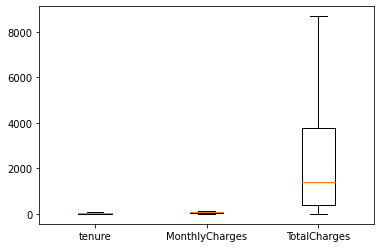

In [16]:
outlier_det_dict = {'tenure':df['tenure'] ,"MonthlyCharges":df["MonthlyCharges"],"TotalCharges":df["TotalCharges"]}
fig, ax = plt.subplots()
ax.boxplot(outlier_det_dict.values())
ax.set_xticklabels(outlier_det_dict.keys());

## Target incelemesi

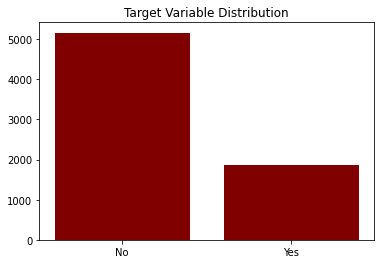

In [17]:
#target dengesiz dağılıyor.
plt.bar(df["Churn"].value_counts().index, df["Churn"].value_counts(), color='maroon')

plt.title("Target Variable Distribution")
plt.show()

# Görselleştirme

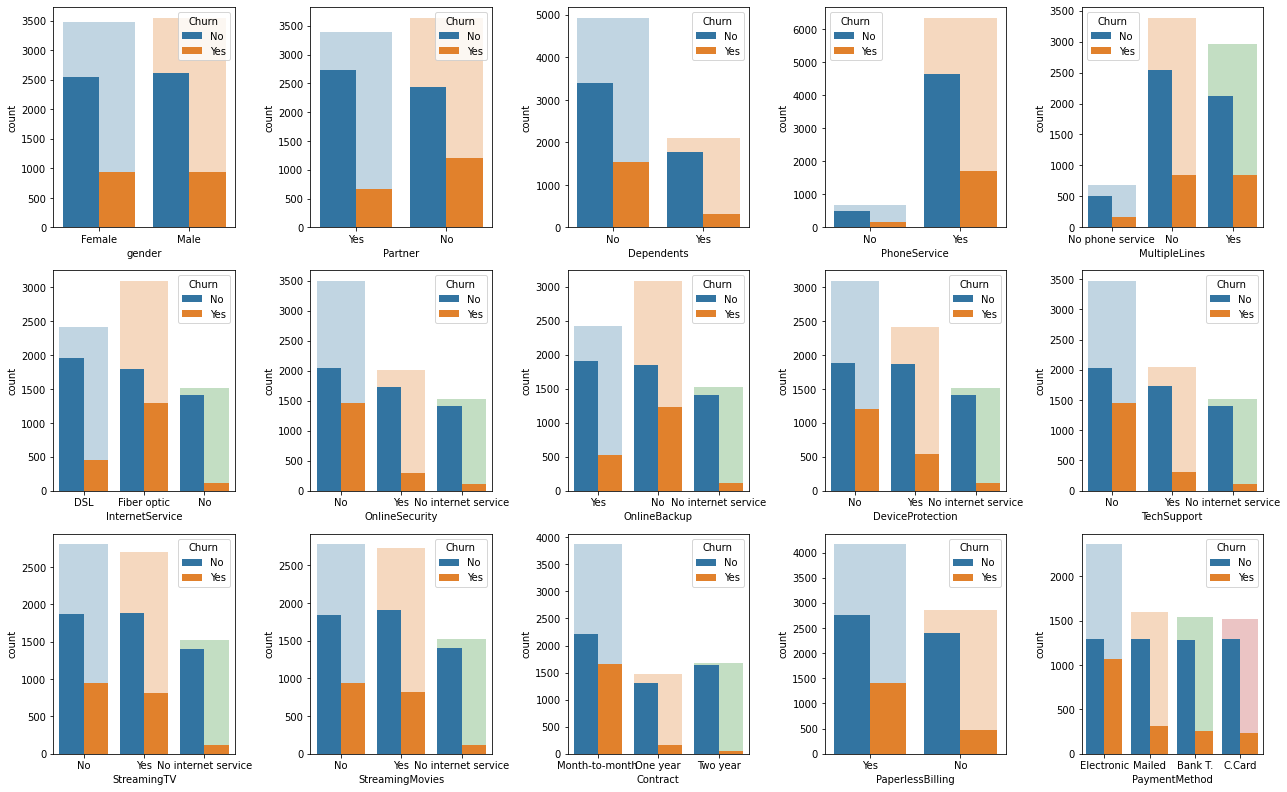

In [18]:
df_cat=list((i for i in df.columns if df[i].dtype=="O" and i!="Churn"))

a = 5  # number of rows
b = 5  # number of columns
c = 1

fig = plt.figure(figsize=(18,18))

for i in df_cat:
    
    plt.subplot(a, b, c)
    sns.countplot(x=i,data=df,alpha=0.3)
    sns.countplot(x=i,hue="Churn",data=df);
    c=c+1
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '% of Gender')

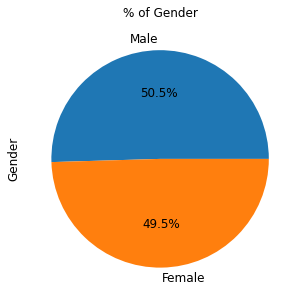

In [31]:
# gender dağılımı
ax = (df['gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = df["gender"].value_counts().index,figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% of Gender', fontsize = 12)

Text(0.5, 1.0, '% of Senior Citizens')

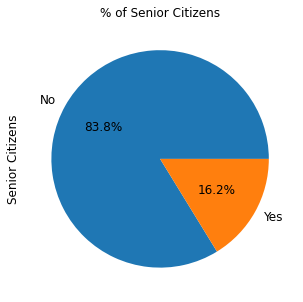

In [33]:
#SeniorCitizen dağılımı
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


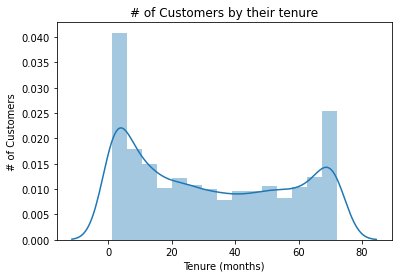

In [37]:
#Tenure incelemesi
ax = sns.distplot(df['tenure'], hist=True);
ax.set_ylabel('# of Customers');
ax.set_xlabel('Tenure (months)');
ax.set_title('# of Customers by their tenure');

# Veri ön işleme kısmı 

In [172]:
df2=df.copy()

## Sürekli değişkenler ile uğraşma

In [173]:
cols_to_scale = ['tenure','MonthlyCharges',"TotalCharges"]

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

## Kategorik değişkenler ile uğraşma 

In [174]:
yes_no_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in yes_no_columns:
    df2[col].replace({'Yes': 1,'No': 0},inplace=True)

In [175]:
cat_cols=list((i for i in df2.columns if df2[i].dtype=="O"))
cat_cols

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [176]:
df2=pd.get_dummies(data=df2,columns=cat_cols,drop_first=True)

# Görselleştirme 2

C:\Users\PC\AppData\Local\Temp\ipykernel_14928\3422374035.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr= df2[cols].corr()


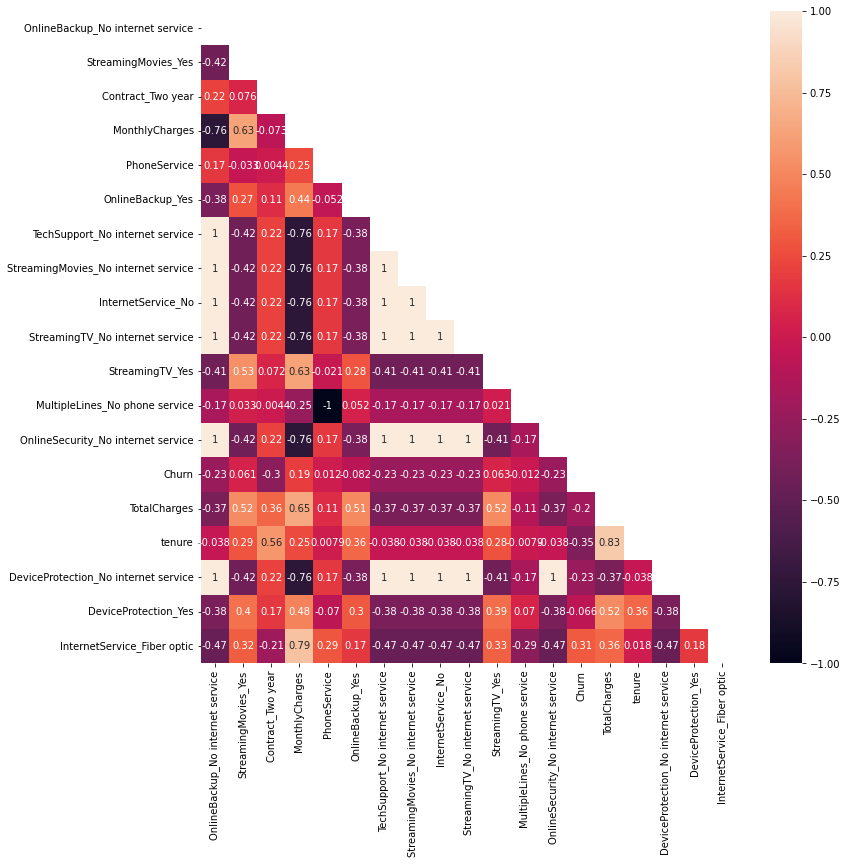

In [179]:
cols=["Churn"]
for i in df2.columns:
    for j in df2.columns:
        if abs(df2[i].corr(df2[j]))>0.5 and i!=j:
            cols.append(i)
cols=set(cols)            
corr= df2[cols].corr()

matrix = np.triu(corr)

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(corr,annot=True,ax=ax,mask=matrix);

<AxesSubplot:>

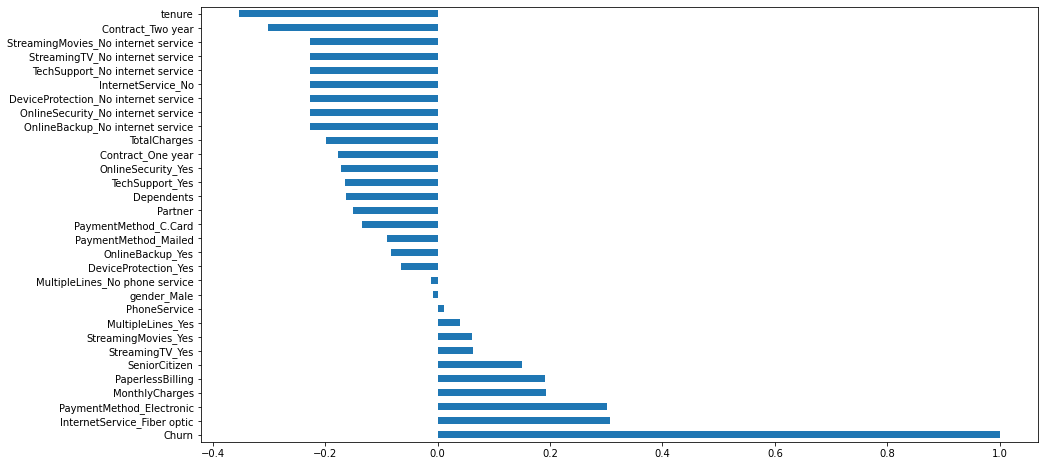

In [181]:
plt.figure(figsize=(15,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='barh')

# Ensemble Method

Ensemble method bağımlı değişkenin dengesiz dağılımında kullanılan yöntemlerden birisidir.Tek bir modele kıyasla daha güçlü ve genellenebilir sonuçlar elde etmek amacıyla birden fazla baz modelin tahmin sonuçlarını birleştirir. Bu çalışmada dengesiz dağılan bağımlı değişkendeki minör sınıfın tamamını, majör sınıfı bölüp her bir bölmeyle minör sınıfımızı birleştirdik ve oluşan her yeni veri seti üzerinden modeller kurduk.

## Datanın bağımlı ve bağımsız değişken olarak ayrılması

In [120]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

## Train-test split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=15, stratify=y)

## Bağımlı değişkenin sınıflarına ayrılması

In [122]:
#X_train ve y_train'den oluşturulan bu dataframeler 3 ayrı parçaya bölünüp her birinin üzerinde model kurulacak.
df3 = X_train.copy()
df3['Churn'] = y_train

df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [123]:
y_train.value_counts()

0    4026
1    1458
Name: Churn, dtype: int64

## Model 1

### X_train, y_train'in bölünmesi

In [124]:
# bağımlı değişkendeki minorty class ile majority class'ların sayısının eşit olmasını amaçlıyoruz.
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1458)

In [125]:
#görüldüğü üzere dengeli dağılımı yakalayabildik.
y_train.value_counts()

0    1458
1    1458
Name: Churn, dtype: int64

### Feature selection

#### Değişkenlerin önem grafiği

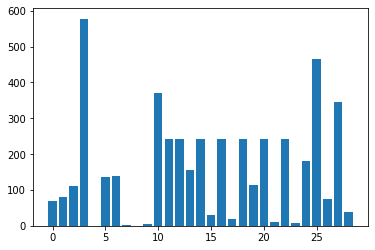

In [126]:
fs = SelectKBest(score_func=f_classif, k='all')

X_selected=fs.fit_transform(X_train, y_train)

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### En önemli görülen değişkenlerin alınması

In [127]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test,k=4)
print(X_train_fs.shape)
print(y_train.shape)
print(X_test_fs.shape)
print(y_test.shape)


(2916, 4)
(2916,)
(1548, 4)
(1548,)


### Şampiyon model seçimi

In [128]:
models={"log_reg":LogisticRegression(max_iter=1000),
        "svc_linear":svm.SVC(kernel='linear'),
        "svc_rbf":svm.SVC(kernel='rbf'),
        "knn":KNeighborsClassifier(),
        "rf":RandomForestClassifier(max_depth=2, random_state=0),
        "nn":MLPClassifier(max_iter=1000),
        "cart":DecisionTreeClassifier(),
        "GBM":GradientBoostingClassifier(), 
        "light_gbm":LGBMClassifier()}
results={}

for name,model in models.items():
    model.fit(X_train_fs,y_train)
    y_pred=model.predict(X_test_fs)
    results[name]=roc_auc_score(y_test,y_pred)
    print("for",name,"models: \n")
    print(classification_report(y_test,y_pred))
    print("-"*25)

for log_reg models: 

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1137
           1       0.47      0.77      0.59       411

    accuracy                           0.71      1548
   macro avg       0.68      0.73      0.68      1548
weighted avg       0.78      0.71      0.73      1548

-------------------------
for svc_linear models: 

              precision    recall  f1-score   support

           0       0.89      0.69      0.77      1137
           1       0.47      0.76      0.58       411

    accuracy                           0.71      1548
   macro avg       0.68      0.72      0.68      1548
weighted avg       0.78      0.71      0.72      1548

-------------------------
for svc_rbf models: 

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1137
           1       0.49      0.75      0.59       411

    accuracy                           0.72      1548
   macr

### Tahminleme

In [129]:
#log reg kur
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1458)
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test,k=4)

model=LogisticRegression(max_iter=500)
model.fit(X_train_fs,y_train)
y_pred1=model.predict(X_test_fs)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1137
           1       0.50      0.75      0.60       411

    accuracy                           0.74      1548
   macro avg       0.70      0.74      0.70      1548
weighted avg       0.79      0.74      0.75      1548



## Model 2

### X_train, y_train'in bölünmesi

In [130]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1458, 2916)

In [131]:
y_train.value_counts()

0    1458
1    1458
Name: Churn, dtype: int64

### Feature selection

#### Değişkenlerin önem grafiği

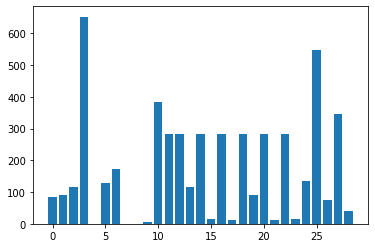

In [132]:
fs = SelectKBest(score_func=f_classif, k='all')

X_selected=fs.fit_transform(X_train, y_train)

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


#### En önemli görülen değişkenlerin alınması

In [133]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test,k=4)
print(X_train_fs.shape)
print(y_train.shape)
print(X_test_fs.shape)
print(y_test.shape)

(2916, 4)
(2916,)
(1548, 4)
(1548,)


### Şampiyon model seçimi

In [134]:
models={"log_reg":LogisticRegression(),
        "svc_linear":svm.SVC(kernel='linear'),
        "svc_rbf":svm.SVC(kernel='rbf'),
        "knn":KNeighborsClassifier(),
        "rf":RandomForestClassifier(max_depth=2, random_state=0),
        "nn":MLPClassifier(),
        "cart":DecisionTreeClassifier(),
        "GBM":GradientBoostingClassifier(), 
        "light_gbm":LGBMClassifier()}
results={}

for name,model in models.items():
    model.fit(X_train_fs,y_train)
    y_pred=model.predict(X_test_fs)
    results[name]=roc_auc_score(y_test,y_pred)
    print("for",name,"models: \n")
    print(classification_report(y_test,y_pred))
    print("-"*25)

for log_reg models: 

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1137
           1       0.49      0.75      0.59       411

    accuracy                           0.72      1548
   macro avg       0.69      0.73      0.69      1548
weighted avg       0.78      0.72      0.74      1548

-------------------------
for svc_linear models: 

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1137
           1       0.48      0.75      0.58       411

    accuracy                           0.71      1548
   macro avg       0.68      0.73      0.68      1548
weighted avg       0.78      0.71      0.73      1548

-------------------------
for svc_rbf models: 

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1137
           1       0.48      0.82      0.60       411

    accuracy                           0.71      1548
   macr

### Tahminleme

In [135]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1458, 2916)
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test,k=4)

model=LogisticRegression(max_iter=500)
model.fit(X_train_fs,y_train)
y_pred2=model.predict(X_test_fs)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1137
           1       0.49      0.75      0.59       411

    accuracy                           0.72      1548
   macro avg       0.69      0.73      0.69      1548
weighted avg       0.78      0.72      0.74      1548



## Model 3

### X_train, y_train'in bölünmesi

In [136]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2916, 4026)

In [137]:
y_train.value_counts()

1    1458
0    1110
Name: Churn, dtype: int64

### Feature selection

#### Değişkenlerin önem grafiği

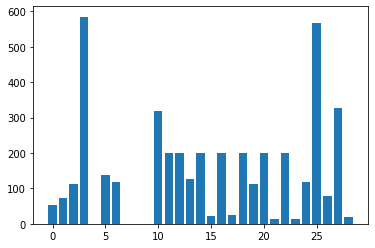

In [138]:
fs = SelectKBest(score_func=f_classif, k='all')

X_selected=fs.fit_transform(X_train, y_train)

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


#### En önemli görülen değişkenlerin alınması

In [139]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test,k=4)
print(X_train_fs.shape)
print(y_train.shape)
print(X_test_fs.shape)
print(y_test.shape)

(2568, 4)
(2568,)
(1548, 4)
(1548,)


### Model kurulması şampiyon model seçimi

In [140]:
models={"log_reg":LogisticRegression(),
        "svc_linear":svm.SVC(kernel='linear'),
        "svc_rbf":svm.SVC(kernel='rbf'),
        "knn":KNeighborsClassifier(),
        "rf":RandomForestClassifier(max_depth=2, random_state=0),
        "nn":MLPClassifier(),
        "cart":DecisionTreeClassifier(),
        "GBM":GradientBoostingClassifier(), 
        "light_gbm":LGBMClassifier()}
results={}

for name,model in models.items():
    model.fit(X_train_fs,y_train)
    y_pred=model.predict(X_test_fs)
    results[name]=roc_auc_score(y_test,y_pred)
    print("for",name,"models: \n")
    print(classification_report(y_test,y_pred))
    print("-"*25)

for log_reg models: 

              precision    recall  f1-score   support

           0       0.91      0.63      0.74      1137
           1       0.45      0.83      0.58       411

    accuracy                           0.68      1548
   macro avg       0.68      0.73      0.66      1548
weighted avg       0.79      0.68      0.70      1548

-------------------------
for svc_linear models: 

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1137
           1       0.43      0.86      0.57       411

    accuracy                           0.65      1548
   macro avg       0.67      0.72      0.64      1548
weighted avg       0.79      0.65      0.67      1548

-------------------------
for svc_rbf models: 

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      1137
           1       0.42      0.85      0.56       411

    accuracy                           0.65      1548
   macr

### Tahminleme

In [141]:
#log reg kur
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2916, 4026)
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test,k=4)
model=LogisticRegression(max_iter=1000)
model.fit(X_train_fs,y_train)
y_pred3=model.predict(X_test_fs)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1137
           1       0.44      0.86      0.59       411

    accuracy                           0.68      1548
   macro avg       0.68      0.73      0.66      1548
weighted avg       0.80      0.68      0.69      1548



In [142]:
#doğrulama

y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>2:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
print(classification_report(y_test, y_pred_final))

# Sonuç

Bu projede amaç tuning değil, dengesiz veri setlerinde ensemble methodun etkisi ve nasıl kullanıldığı olduğu için ilk 3 modelin alınıp tune edilmesi kısmı atlanılacaktır. 
<br>
Ensemble method kullanılarak elde edilen sonuçların doğrulama metrik çıktılarını inceleyip projeyi bitireceğiz.

In [157]:
print("Classification Report:\n\n",classification_report(y_test, y_pred_final))
print("-"*20)
print("Confusion Matrix:\n\n",confusion_matrix(y_test, y_pred_final))
print("-"*20)
print("Accuracy Score:",accuracy_score(y_test,y_pred_final))
print("-"*20)
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_final))

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1137
           1       0.51      0.74      0.60       411

    accuracy                           0.74      1548
   macro avg       0.70      0.74      0.70      1548
weighted avg       0.79      0.74      0.75      1548

--------------------
Confusion Matrix:

 [[841 296]
 [106 305]]
--------------------
Accuracy Score: 0.7403100775193798
--------------------
ROC AUC Score: 0.7408791222900577
